In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fancyimpute import IterativeImputer

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


# Reading and Studying Data

In [2]:
# reading data
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# creating a backup dataframe of original data
backup = telecom.copy()

In [7]:
# Now identifying the columns as per their data types
unique_fields = ['mobile_number', 'circle_id']

In [8]:
def identifyDateCol(x):
    if x.find('date') > -1:
        return x
date_fields = list(filter(identifyDateCol, telecom.columns))
date_fields

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [9]:
# category fields are those which contains 0's and 1's
category_fields = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [10]:
# since the majority of the data is in int or float, we can term them as numberical 
num_fields = list(set(telecom.columns).difference(set(unique_fields)).difference(set(date_fields)).difference(set(category_fields)))
num_fields

['last_day_rch_amt_7',
 'arpu_8',
 'loc_ic_t2m_mou_8',
 'total_og_mou_6',
 'loc_og_t2t_mou_9',
 'arpu_9',
 'monthly_2g_9',
 'jun_vbc_3g',
 'monthly_3g_7',
 'arpu_7',
 'roam_ic_mou_6',
 'loc_ic_t2f_mou_8',
 'total_rech_data_9',
 'loc_ic_t2t_mou_9',
 'last_day_rch_amt_6',
 'arpu_2g_6',
 'sachet_2g_8',
 'spl_og_mou_7',
 'og_others_8',
 'loc_og_t2m_mou_9',
 'std_ic_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'offnet_mou_7',
 'ic_others_6',
 'av_rech_amt_data_8',
 'loc_og_t2c_mou_7',
 'onnet_mou_7',
 'loc_ic_t2f_mou_9',
 'sachet_2g_7',
 'av_rech_amt_data_9',
 'max_rech_data_8',
 'total_rech_num_9',
 'roam_og_mou_7',
 'total_ic_mou_8',
 'aug_vbc_3g',
 'loc_ic_t2t_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_og_mou_8',
 'std_og_t2f_mou_7',
 'spl_ic_mou_9',
 'isd_og_mou_7',
 'last_day_rch_amt_8',
 'loc_og_t2f_mou_7',
 'std_og_mou_6',
 'roam_og_mou_6',
 'count_rech_3g_8',
 'arpu_2g_9',
 'std_ic_t2t_mou_8',
 'ic_others_9',
 'offnet_mou_9',
 'arpu_2g_8',
 'loc_og_t2c_mou_9',
 'total_rech_data_7'

In [11]:
# Verifying that all columns fall under some data type variables we created
len(telecom.columns) == len(unique_fields) + len(date_fields) + len(category_fields) + len(num_fields)

True

# Handling Missing Data

In [12]:
# Dropping all the columns with id fields as it is not useful in our analysis
telecom = telecom.drop(unique_fields, axis = 1)
telecom.shape

(99999, 224)

In [13]:
# Analyzing all the columns which has recharge information
def identifyRechargeCol(x):
    if x.find('rech') > -1:
        return x
recharge_fields = list(filter(identifyRechargeCol, telecom.columns))
recharge_fields

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [14]:
telecom[recharge_fields].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,...,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,...,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000


In [15]:
# It is observed that some recharge column have min value as 1
# So we are assuming the empty values for such colums should be 0 as they did not recharge in that particular month
# recharge_fields_min_1 = telecom[telecom[recharge_fields].min() > 0]
# recharge_fields_min_1
telecom[recharge_fields].min() > 0

total_rech_num_6      False
total_rech_num_7      False
total_rech_num_8      False
total_rech_num_9      False
total_rech_amt_6      False
total_rech_amt_7      False
total_rech_amt_8      False
total_rech_amt_9      False
max_rech_amt_6        False
max_rech_amt_7        False
max_rech_amt_8        False
max_rech_amt_9        False
total_rech_data_6      True
total_rech_data_7      True
total_rech_data_8      True
total_rech_data_9      True
max_rech_data_6        True
max_rech_data_7        True
max_rech_data_8        True
max_rech_data_9        True
count_rech_2g_6       False
count_rech_2g_7       False
count_rech_2g_8       False
count_rech_2g_9       False
count_rech_3g_6       False
count_rech_3g_7       False
count_rech_3g_8       False
count_rech_3g_9       False
av_rech_amt_data_6     True
av_rech_amt_data_7     True
av_rech_amt_data_8     True
av_rech_amt_data_9     True
dtype: bool

In [16]:
recharge_fields_min_1 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [17]:
# imputing NA values with 0s
telecom[recharge_fields_min_1] = telecom[recharge_fields_min_1].apply(lambda x: x.fillna(0))

In [18]:
# Handling missing values for categorical values
telecom[category_fields].isnull().sum()/telecom.shape[0]

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [19]:
# There's lot of missing data here
# If user had recharged for night pack or if user had done fb recharge, the data definitely would have been present
# Hence, imputing NA values for categorical fields with 0 as it is assumed the user has not made any recharges for that type
telecom[category_fields] = telecom[category_fields].apply(lambda x: x.fillna(0))

In [20]:
telecom[category_fields].isnull().sum()/telecom.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [21]:
# dropping date columns as it is not required for our analysis
telecom = telecom.drop(date_fields, axis = 1)

In [22]:
# checking entire dataset for null values
telecom.isnull().sum()/telecom.shape[0]

loc_og_t2o_mou      0.010180
std_og_t2o_mou      0.010180
loc_ic_t2o_mou      0.010180
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
arpu_9              0.000000
onnet_mou_6         0.039370
onnet_mou_7         0.038590
onnet_mou_8         0.053781
onnet_mou_9         0.077451
offnet_mou_6        0.039370
offnet_mou_7        0.038590
offnet_mou_8        0.053781
offnet_mou_9        0.077451
roam_ic_mou_6       0.039370
roam_ic_mou_7       0.038590
roam_ic_mou_8       0.053781
roam_ic_mou_9       0.077451
roam_og_mou_6       0.039370
roam_og_mou_7       0.038590
roam_og_mou_8       0.053781
roam_og_mou_9       0.077451
loc_og_t2t_mou_6    0.039370
loc_og_t2t_mou_7    0.038590
loc_og_t2t_mou_8    0.053781
loc_og_t2t_mou_9    0.077451
loc_og_t2m_mou_6    0.039370
loc_og_t2m_mou_7    0.038590
loc_og_t2m_mou_8    0.053781
                      ...   
arpu_2g_9           0.740777
night_pck_user_6    0.000000
night_pck_user_7    0.000000
night_pck_user

In [23]:
# dropping columns having more than 70% of missing data
def removeColumn(x):
    if telecom[x].isnull().sum()/telecom.shape[0] < 0.7:
        return x
final_columns = list(filter(removeColumn, telecom.columns))
final_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [24]:
len(final_columns)

196

In [25]:
100*(telecom[final_columns].isnull().sum()/telecom.shape[0])

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
arpu_9              0.000000
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
                      ...   
vol_3g_mb_9         0.000000
night_pck_user_6    0.000000
night_pck_user_7    0.000000
night_pck_user

In [26]:
# now imputing mssing values using iteartive imputer as percentage of missing values are now low

In [27]:
telecom1 = telecom[final_columns]
telecom1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


In [28]:
telecom_clean = pd.DataFrame(IterativeImputer().fit_transform(telecom1))
telecom_clean.columns = final_columns
telecom_clean.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,131.660977,127.602322,0.00,...,0.0,1.0,1.0,1.0,0.0,968.0,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,...,0.0,0.0,1.0,1.0,0.0,1006.0,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.540000,55.240000,37.26,...,0.0,0.0,0.0,0.0,1.0,1103.0,0.0,0.0,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.910000,54.390000,310.98,...,0.0,0.0,0.0,0.0,0.0,2491.0,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.310000,149.440000,83.89,...,0.0,0.0,0.0,0.0,0.0,1526.0,0.0,0.0,0.00,0.00


In [75]:
# creating backup for future use
telecom_clean_backup = telecom_clean.copy()
# telecom_clean = telecom_clean_backup.copy()

In [76]:
telecom_clean[category_fields] = telecom_clean[category_fields].astype('int')

In [77]:
# verifying there are no null or NA values in our dataset
telecom_clean.isnull().sum()

loc_og_t2o_mou      0
std_og_t2o_mou      0
loc_ic_t2o_mou      0
arpu_6              0
arpu_7              0
arpu_8              0
arpu_9              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
onnet_mou_9         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
offnet_mou_9        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_ic_mou_9       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
roam_og_mou_9       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2t_mou_9    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
                   ..
vol_3g_mb_9         0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_2g_9        0
sachet_2g_6         0
sachet_2g_7         0
sachet_2g_8         0
sachet_2g_9         0
monthly_3g_6        0
monthly_3g

# Identifying High Value Customers

In [78]:
# First we will calculate total recharge (recharge amount + recharge data) done by customer in month of June and July
# Calculating total data recharge = no. of recharge done * average amount of recharge of data done
telecom_clean['total_data_rech_6'] = telecom_clean.total_rech_data_6 * telecom_clean.av_rech_amt_data_6
telecom_clean['total_data_rech_7'] = telecom_clean.total_rech_data_7 * telecom_clean.av_rech_amt_data_7

In [79]:
# Calculating total recharge = total recharge amount (talktime) + total data recharge amount
telecom_clean['total_spending_6'] = telecom_clean['total_rech_amt_6'] + telecom_clean['total_data_rech_6']
telecom_clean['total_spending_7'] = telecom_clean['total_rech_amt_7'] + telecom_clean['total_data_rech_7']

In [80]:
# Calculating the average spending by each customer for month of June and July
telecom_clean['av_amnt_spend_6_7'] = (telecom_clean['total_spending_6'] + telecom_clean['total_spending_7']) / 2

In [81]:
# Now calculating the 70 percentile of average spending
telecom_clean['av_amnt_spend_6_7'].quantile(0.7)

478.0

##### The 70 percentile for average spending done by customers in month of June and July is Rs. 478

###### Now we only keep the customers which are high value. So we will filter out customers whose spending are less than 70 percentile i.e. Rs. 478

In [82]:
# Filtering the High Value Customers
telecom_final = telecom_clean.loc[telecom_clean['av_amnt_spend_6_7'] >= telecom_clean['av_amnt_spend_6_7'].quantile(0.7)]
telecom_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_spending_6,total_spending_7,av_amnt_spend_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,131.660977,127.602322,0.00,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.840000,54.680000,52.29,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.690000,351.030000,35.08,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.410000,132.110000,85.14,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.960000,50.660000,33.58,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0


In [83]:
# Reset index
telecom_final = telecom_final.reset_index(drop=True)
telecom_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,total_spending_6,total_spending_7,av_amnt_spend_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,131.660977,127.602322,0.00,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.840000,54.680000,52.29,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.690000,351.030000,35.08,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.410000,132.110000,85.14,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
4,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.960000,50.660000,33.58,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0


In [84]:
# Removing unwamted columns
telecom_final = telecom_final.drop(['total_data_rech_6', 'total_data_rech_7', 'total_spending_6', 'total_spending_7', 'av_amnt_spend_6_7'], axis = 1)

In [85]:
telecom_final.shape

(30001, 196)

##### The number of High Value Customers are approx 30K and 196 KPIs

# Identifying Churn

##### If incoming and outgoing calls as well as data pack is zero, we can consider it as churned

In [86]:
# Calculating total data used in month of September (2g + 3g)
telecom_final['total_internet_mb_9'] =  telecom_final['vol_2g_mb_9'] + telecom_final['vol_3g_mb_9']

In [87]:
# Calculating total incoming and outgoing minutes in month of September
telecom_final['total_calls_mou_9'] = telecom_final['total_ic_mou_9'] + telecom_final['total_og_mou_9']

In [88]:
# if total_internet_mb_9 and total_calls_mou_9 = 0, then churn (1) else not churn (0)
telecom_final['churn'] = telecom_final.apply(lambda x: 1 if (x['total_internet_mb_9'] == 0 and x['total_calls_mou_9'] == 0) else 0, axis = 1) 

In [89]:
# Removing unwanted columns
telecom_final = telecom_final.drop(['total_internet_mb_9', 'total_calls_mou_9'], axis = 1)

In [90]:
# Converting churn data type to category
telecom_final['churn'] = telecom_final['churn'].astype('category')

In [91]:
# Calculating percentage of churns
100 * (telecom_final['churn'].value_counts()/telecom_final.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64

##### There is only approx. 8% of churn in the data which means there is high imbalance

# Removing the data which belongs to month of September

In [92]:
telecom_final = telecom_final.filter(regex='[^9]$', axis=1)
telecom_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,131.660977,127.602322,0.00,198.644403,...,0.0,1,1,1,968.0,30.40,0.00,101.20,3.58,1
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,...,0.0,0,0,0,802.0,57.74,19.38,18.74,0.00,1
2,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,...,0.0,0,1,1,315.0,21.03,910.65,122.16,0.00,0
3,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,...,0.0,0,0,0,720.0,0.00,0.00,0.00,0.00,0
4,0.0,0.0,0.0,74.350,193.897,366.966,48.960000,50.660000,33.58,85.410000,...,1.0,0,1,1,604.0,40.45,51.86,0.00,0.00,0


In [93]:
telecom_final.shape

(30001, 150)

##### We can use 8th months data in our analysis since if can provide insight above customer behaviour between good phase and churning phase

##### Taking difference between the 8th month and good phase period will help to evaluate the model better

In [94]:
month_8_cols = [col for col in telecom_final.columns if '_8' in col]
month_8_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8']

In [95]:
# We will ignore all t2t, t2f, t2m data and will only consider the total of that particular group
telecom_final[month_8_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 47 columns):
arpu_8                30001 non-null float64
onnet_mou_8           30001 non-null float64
offnet_mou_8          30001 non-null float64
roam_ic_mou_8         30001 non-null float64
roam_og_mou_8         30001 non-null float64
loc_og_t2t_mou_8      30001 non-null float64
loc_og_t2m_mou_8      30001 non-null float64
loc_og_t2f_mou_8      30001 non-null float64
loc_og_t2c_mou_8      30001 non-null float64
loc_og_mou_8          30001 non-null float64
std_og_t2t_mou_8      30001 non-null float64
std_og_t2m_mou_8      30001 non-null float64
std_og_t2f_mou_8      30001 non-null float64
std_og_t2c_mou_8      30001 non-null float64
std_og_mou_8          30001 non-null float64
isd_og_mou_8          30001 non-null float64
spl_og_mou_8          30001 non-null float64
og_others_8           30001 non-null float64
total_og_mou_8        30001 non-null float64
loc_ic_t2t_mou_8      30001 non-null

In [96]:
telecom_final['arpu_diff'] = telecom_final.arpu_8 - ((telecom_final.arpu_6 + telecom_final.arpu_7)/2)

telecom_final['onnet_mou_diff'] = telecom_final.onnet_mou_8 - ((telecom_final.onnet_mou_6 + telecom_final.onnet_mou_7)/2)

telecom_final['offnet_mou_diff'] = telecom_final.offnet_mou_8 - ((telecom_final.offnet_mou_6 + telecom_final.offnet_mou_7)/2)

telecom_final['roam_ic_mou_diff'] = telecom_final.roam_ic_mou_8 - ((telecom_final.roam_ic_mou_6 + telecom_final.roam_ic_mou_7)/2)

telecom_final['roam_og_mou_diff'] = telecom_final.roam_og_mou_8 - ((telecom_final.roam_og_mou_6 + telecom_final.roam_og_mou_7)/2)

telecom_final['loc_og_mou_diff'] = telecom_final.loc_og_mou_8 - ((telecom_final.loc_og_mou_6 + telecom_final.loc_og_mou_7)/2)

telecom_final['std_og_mou_diff'] = telecom_final.std_og_mou_8 - ((telecom_final.std_og_mou_6 + telecom_final.std_og_mou_7)/2)

telecom_final['isd_og_mou_diff'] = telecom_final.isd_og_mou_8 - ((telecom_final.isd_og_mou_6 + telecom_final.isd_og_mou_7)/2)

telecom_final['spl_og_mou_diff'] = telecom_final.spl_og_mou_8 - ((telecom_final.spl_og_mou_6 + telecom_final.spl_og_mou_7)/2)

telecom_final['total_og_mou_diff'] = telecom_final.total_og_mou_8 - ((telecom_final.total_og_mou_6 + telecom_final.total_og_mou_7)/2)

telecom_final['loc_ic_mou_diff'] = telecom_final.loc_ic_mou_8 - ((telecom_final.loc_ic_mou_6 + telecom_final.loc_ic_mou_7)/2)

telecom_final['std_ic_mou_diff'] = telecom_final.std_ic_mou_8 - ((telecom_final.std_ic_mou_6 + telecom_final.std_ic_mou_7)/2)

telecom_final['isd_ic_mou_diff'] = telecom_final.isd_ic_mou_8 - ((telecom_final.isd_ic_mou_6 + telecom_final.isd_ic_mou_7)/2)

telecom_final['spl_ic_mou_diff'] = telecom_final.spl_ic_mou_8 - ((telecom_final.spl_ic_mou_6 + telecom_final.spl_ic_mou_7)/2)

telecom_final['total_ic_mou_diff'] = telecom_final.total_ic_mou_8 - ((telecom_final.total_ic_mou_6 + telecom_final.total_ic_mou_7)/2)

telecom_final['total_rech_num_diff'] = telecom_final.total_rech_num_8 - ((telecom_final.total_rech_num_6 + telecom_final.total_rech_num_7)/2)

telecom_final['total_rech_amt_diff'] = telecom_final.total_rech_amt_8 - ((telecom_final.total_rech_amt_6 + telecom_final.total_rech_amt_7)/2)

telecom_final['max_rech_amt_diff'] = telecom_final.max_rech_amt_8 - ((telecom_final.max_rech_amt_6 + telecom_final.max_rech_amt_7)/2)

telecom_final['total_rech_data_diff'] = telecom_final.total_rech_data_8 - ((telecom_final.total_rech_data_6 + telecom_final.total_rech_data_7)/2)

telecom_final['max_rech_data_diff'] = telecom_final.max_rech_data_8 - ((telecom_final.max_rech_data_6 + telecom_final.max_rech_data_7)/2)

telecom_final['av_rech_amt_data_diff'] = telecom_final.av_rech_amt_data_8 - ((telecom_final.av_rech_amt_data_6 + telecom_final.av_rech_amt_data_7)/2)

telecom_final['vol_2g_mb_diff'] = telecom_final.vol_2g_mb_8 - ((telecom_final.vol_2g_mb_6 + telecom_final.vol_2g_mb_7)/2)

telecom_final['vol_3g_mb_diff'] = telecom_final.vol_3g_mb_8 - ((telecom_final.vol_3g_mb_6 + telecom_final.vol_3g_mb_7)/2)

# telecom_final['night_pck_user_diff'] = telecom_final.night_pck_user_8 - ((telecom_final.night_pck_user_6 + telecom_final.night_pck_user_7)/2)

telecom_final['monthly_2g_diff'] = telecom_final.monthly_2g_8 - ((telecom_final.monthly_2g_6 + telecom_final.monthly_2g_7)/2)

telecom_final['sachet_2g_diff'] = telecom_final.sachet_2g_8 - ((telecom_final.sachet_2g_6 + telecom_final.sachet_2g_7)/2)

telecom_final['monthly_3g_diff'] = telecom_final.monthly_3g_8 - ((telecom_final.monthly_3g_6 + telecom_final.monthly_3g_7)/2)

telecom_final['sachet_3g_diff'] = telecom_final.sachet_3g_8 - ((telecom_final.sachet_3g_6 + telecom_final.sachet_3g_7)/2)

# telecom_final['fb_user_diff'] = telecom_final.fb_user_8 - ((telecom_final.fb_user_6 + telecom_final.fb_user_7)/2)

In [97]:
telecom_final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,131.660977,127.602322,0.00,198.644403,...,0.0,0.0,0.0,0.0,-9.975,-7.555,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,...,395.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,...,-92.0,2.0,-54.0,-19.5,-177.970,-363.535,-0.5,2.5,0.0,0.0
3,0.0,0.0,0.0,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,...,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,74.350,193.897,366.966,48.960000,50.660000,33.58,85.410000,...,89.5,1.0,89.5,92.0,-0.230,710.375,0.0,0.0,0.0,1.0


In [98]:
telecom_final.shape

(30001, 177)

In [99]:
telecom_final.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 177 columns):
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64

# EDA

### UNIVARIATE ANALYSIS

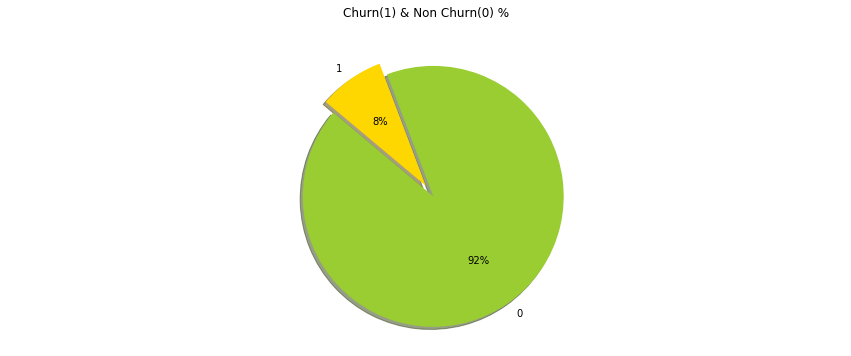

In [100]:
df_plot = telecom_final.copy()
from matplotlib.pyplot import pie, axis, show
plt.figure(figsize=(15, 6))
plt.title("Churn(1) & Non Churn(0) %")
sums = df_plot.churn.groupby(df_plot.churn).count()
axis('equal')
colors = ['yellowgreen', 'gold']
explode = (0.1, 0)  # explode 1st slice
pie(sums, labels=sums.index, explode = explode, colors = colors,autopct='%1.0f%%', shadow=True, startangle=140)
show()

###### There is only approx. 8% of churn in the data which means there is high imbalance

In [101]:
df_plot['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [102]:
# Creating buckets on the feature age on network for further analysis
buck = [0, 365, 1095, 1825, 2555, 5000]
lab = ['0-1', '1-3', '3-5', '5-7', '7 and above']
df_plot['aon_years'] = pd.cut(df_plot['aon'], buck, labels=lab)

In [103]:
# Calulating Churn % based on Age on Network
var1 = df_plot.groupby(['aon_years','churn']).churn.count()
var1 = pd.DataFrame(var1.unstack())
var1 = var1.rename(columns={1: "Churn", 0: "Non Churn"})

var1['Churn%'] = round(100*var1['Churn']/(var1['Non Churn']+var1['Churn']),2)
var1

churn,Non Churn,Churn,Churn%
aon_years,,,
0-1,4653,634,11.99
1-3,11361,1257,9.96
3-5,4610,286,5.84
5-7,2965,112,3.64
7 and above,3971,152,3.69


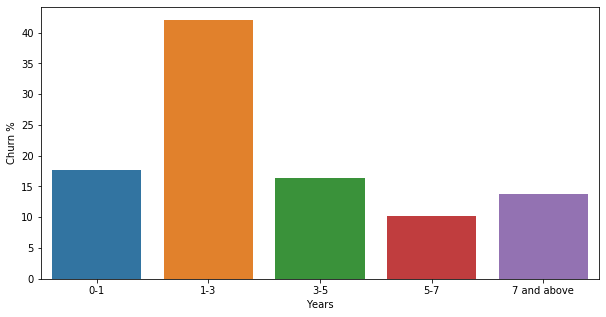

In [104]:
df_plot['churn'] = pd.to_numeric(df_plot['churn'])
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="aon_years",y="churn", data=df_plot, estimator=lambda x:len(x)/len(telecom_final)*100)
ax.set(xlabel='Years', ylabel='Churn %')
plt.show()

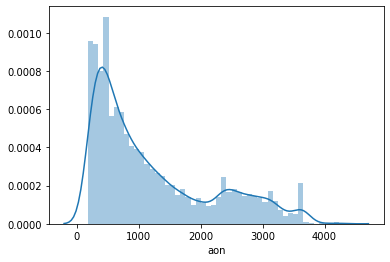

In [105]:
# plotting AON
sns.distplot(df_plot['aon'])

#### There are more customers who are 400-700 days old using this network

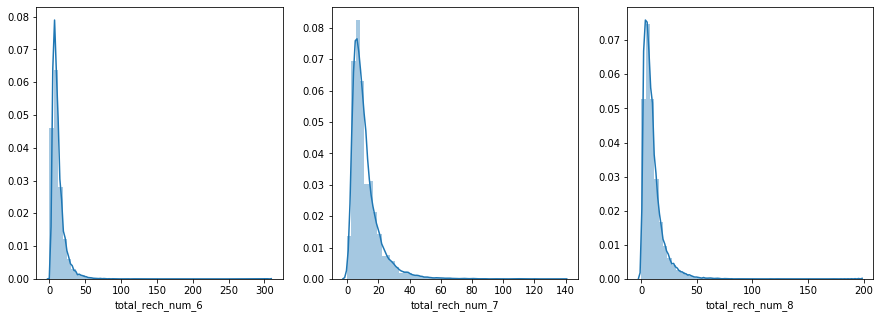

In [106]:
# Total recharge amount in one month
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.distplot(df_plot['total_rech_num_6'])
plt.subplot(1, 3, 2)
sns.distplot(df_plot['total_rech_num_7'])
plt.subplot(1, 3, 3)
sns.distplot(df_plot['total_rech_num_8'])
plt.show()

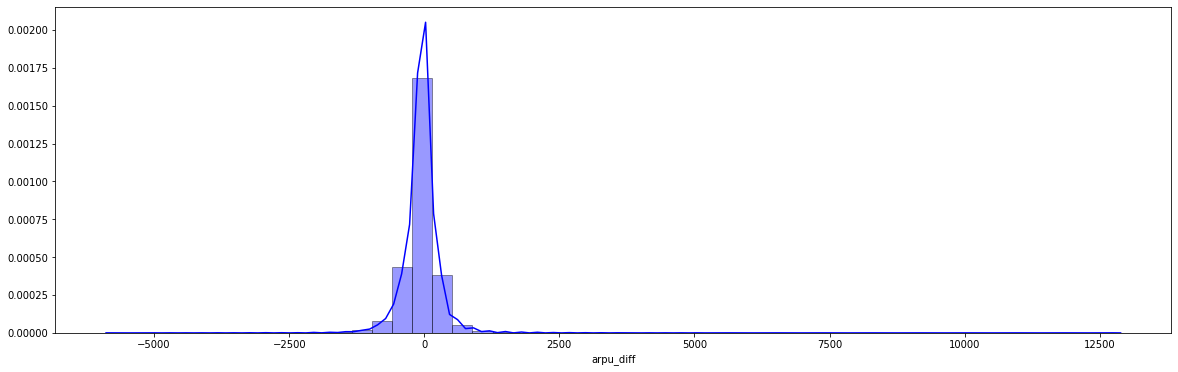

In [107]:
plt.figure(figsize=[20, 6])
sns.distplot(df_plot['arpu_diff'], hist=True, kde=True, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

### BIVARIATE ANALYSIS

In [108]:
df_plot["total_rech_amt_diff"].describe()

count    30001.000000
mean       -76.249725
std        418.479122
min      -6950.000000
25%       -245.000000
50%        -57.500000
75%         99.500000
max      14344.500000
Name: total_rech_amt_diff, dtype: float64

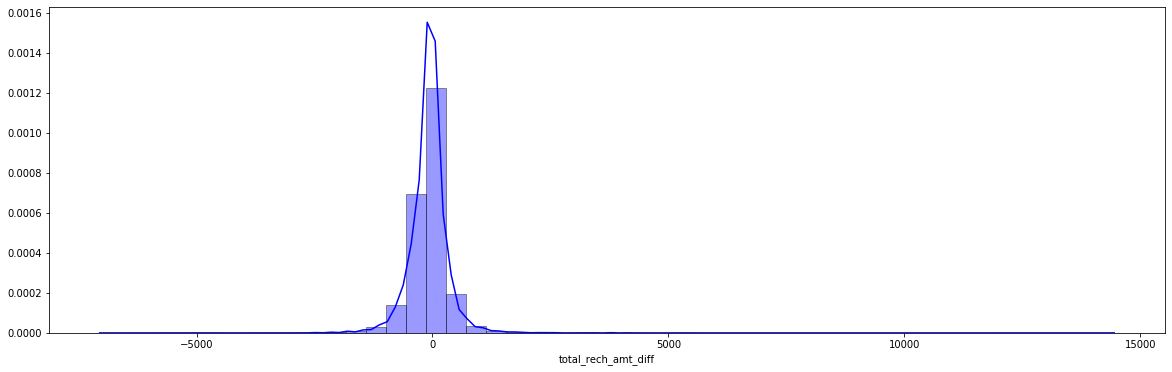

In [109]:
# Histogram plotting on Total Recharge Amount Difference

plt.figure(figsize=[20, 6])
sns.distplot(df_plot["total_rech_amt_diff"], hist=True, kde=True, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

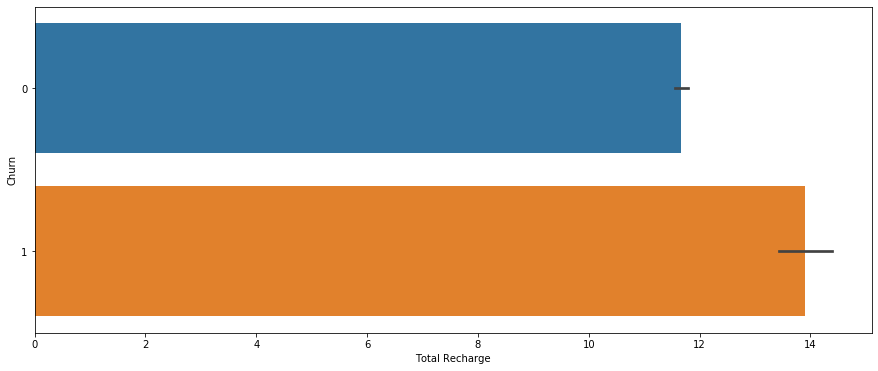

In [110]:
df_plot['churn'] = df_plot['churn'].astype('category')
plt.figure(figsize=(15, 6))
ax = sns.barplot(x="total_rech_num_6",y="churn", data=df_plot)
ax.set(xlabel='Total Recharge', ylabel='Churn')
plt.show()

<Figure size 720x432 with 0 Axes>

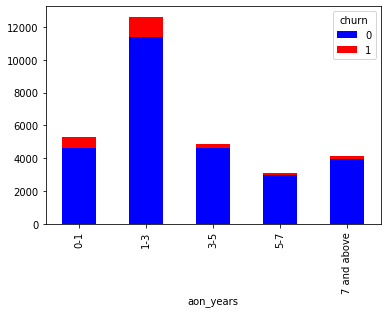

In [111]:
plt.figure(figsize=[10, 6])
var = df_plot.groupby(['aon_years','churn']).aon_years.count()
var.unstack().plot(kind='bar',stacked=True,  color=['blue', 'red'], grid=False)

#### The churn rate is more for customers who are less than 3 years old with the network

### Treating outlier

In [112]:
for col in telecom_final.columns:
    if telecom_final[col].dtype == np.float:
        percentiles = telecom_final[col].quantile([0.1,0.90]).values
        telecom_final[col] = np.clip(telecom_final[col], percentiles[0], percentiles[1])

In [113]:
telecom_final['night_pck_user_6'].value_counts()

0    29594
1      407
Name: night_pck_user_6, dtype: int64

In [114]:
telecom_final.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.0,0.0,0.0,520.748874,522.161829,466.249309,202.601653,207.243314,175.459556,318.970566,...,-6.363588,-0.162728,-6.761241,-14.638191,-19.241339,-17.038955,-0.060581,-0.097847,-0.060298,-0.058898
std,0.0,0.0,0.0,259.002460,257.960989,281.774619,246.291679,256.368116,215.304925,285.452562,...,52.415359,0.971666,37.121396,75.824854,64.154915,178.288395,0.163161,0.668668,0.162831,0.161186
min,0.0,0.0,0.0,171.605000,177.886000,84.000000,1.760000,1.530000,0.810000,17.280000,...,-109.500000,-2.000000,-88.500000,-152.000000,-168.225000,-383.960000,-0.500000,-1.500000,-0.500000,-0.500000
25%,0.0,0.0,0.0,309.865000,309.826000,231.473000,20.010000,18.930000,15.630000,80.710000,...,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,481.694000,480.943000,427.585000,92.440000,90.780000,80.790000,222.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,699.943000,698.315000,661.491000,290.440000,290.240000,240.060000,487.940000,...,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.0,0.0,0.0,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,...,71.000000,1.500000,50.000000,116.000000,68.235000,310.945000,0.000000,1.000000,0.000000,0.000000
99%,0.0,0.0,0.0,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,...,71.000000,1.500000,50.000000,116.000000,68.235000,310.945000,0.000000,1.000000,0.000000,0.000000
max,0.0,0.0,0.0,994.099000,995.859000,977.345000,754.160000,784.480000,665.080000,895.830000,...,71.000000,1.500000,50.000000,116.000000,68.235000,310.945000,0.000000,1.000000,0.000000,0.000000


# MODELLING

In [115]:
# installing dependencies for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [116]:
# splitting dependent and independent varialbles
X = telecom_final.drop(['churn'], axis=1)
y = telecom_final['churn']

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Random Forest

In [118]:
# finding best hyperparamters using GridSearchCV
n_folds = 3

parameters = {'max_depth': [4,8,10],
    'min_samples_leaf': [100, 300],
    'min_samples_split': [200, 400],
    'n_estimators': [100, 200], 
    'max_features': [5, 20] }

rf = RandomForestClassifier(class_weight = 'balanced')


rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score = True,
                   scoring="accuracy",
                 n_jobs = -1,
                 verbose = 1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [119]:
print("best accuracy", rf.best_score_)
print(rf.best_estimator_)

best accuracy 0.8907619047619048
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [120]:
# generating random forest model using best estimators
rf1 = RandomForestClassifier(class_weight = 'balanced', criterion='gini', max_depth=10, max_features=5, min_samples_leaf=100, min_samples_split=200, n_estimators=100)

In [121]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [122]:
# prediction
y_pred_rm = rf1.predict(X_test)

In [123]:
# Evaluating model
print(classification_report(y_test,y_pred_rm))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8251
           1       0.43      0.81      0.56       750

    accuracy                           0.90      9001
   macro avg       0.71      0.85      0.75      9001
weighted avg       0.94      0.90      0.91      9001



In [124]:
accuracy_score(y_pred_rm, y_test)

0.8960115542717476

In [125]:
confusion_mat = confusion_matrix(y_test,y_pred_rm)

In [126]:
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [127]:
sensitivity_rf = TP / float(TP+FN)
specificity_rf = TN / float(TN+FP)

In [128]:
print('Using PCA with SVM : Sensitivity - '+str(sensitivity_rf)+' Specificity - '+str(specificity_rf) )

Using PCA with SVM : Sensitivity - 0.8053333333333333 Specificity - 0.9042540298145679


In [130]:
# Identifying top features directly impacting churns
features = telecom_final.drop('churn', axis=1).columns

importance = rf1.feature_importances_

feature_importance = pd.DataFrame({'Features': features, 'Percentage': importance*100})
feature_importance = feature_importance[['Features', 'Percentage']]

feature_importance = feature_importance.sort_values('Percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.Percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,Features,Percentage
0,total_og_mou_8,5.774099
1,total_ic_mou_8,5.284520
2,roam_og_mou_8,4.041975
3,last_day_rch_amt_8,4.019524
4,roam_ic_mou_8,3.461724
5,arpu_diff,3.298728
6,total_rech_amt_8,3.202288
7,arpu_8,3.047965
8,total_rech_amt_diff,2.908642
9,roam_ic_mou_diff,2.664529


## PCA

In [131]:
pca = PCA()

steps = [("scaler", StandardScaler()), ("pca", pca)]

pca_model = Pipeline(steps)

In [132]:
pca_model.fit(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [134]:
pca.explained_variance_ratio_

array([1.31205689e-01, 1.07236713e-01, 5.83476302e-02, 5.14517071e-02,
       3.96184561e-02, 3.45867680e-02, 2.86344494e-02, 2.48290450e-02,
       2.17766417e-02, 2.06468308e-02, 1.84619701e-02, 1.64194804e-02,
       1.61944445e-02, 1.51371636e-02, 1.43950568e-02, 1.39688432e-02,
       1.31616591e-02, 1.29794229e-02, 1.25069018e-02, 1.23233610e-02,
       1.19659680e-02, 1.16248008e-02, 1.07751101e-02, 1.01108681e-02,
       9.73665058e-03, 9.25173795e-03, 8.95791633e-03, 8.53432759e-03,
       8.39599274e-03, 8.22898958e-03, 7.70446409e-03, 7.28114077e-03,
       6.74737618e-03, 6.22506491e-03, 6.09702196e-03, 6.05092787e-03,
       5.91058680e-03, 5.77538391e-03, 5.56125125e-03, 5.45579692e-03,
       5.41398499e-03, 5.05895100e-03, 4.97255136e-03, 4.87316472e-03,
       4.75999050e-03, 4.63007973e-03, 4.53092895e-03, 4.26851712e-03,
       4.01562712e-03, 3.95755630e-03, 3.79061276e-03, 3.73780639e-03,
       3.64629028e-03, 3.59468269e-03, 3.49769543e-03, 3.45664867e-03,
      

In [135]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.12
1       23.84
2       29.68
3       34.82
4       38.79
5       42.24
6       45.11
7       47.59
8       49.77
9       51.83
10      53.68
11      55.32
12      56.94
13      58.45
14      59.89
15      61.29
16      62.61
17      63.91
18      65.16
19      66.39
20      67.58
21      68.75
22      69.82
23      70.84
24      71.81
25      72.73
26      73.63
27      74.48
28      75.32
29      76.15
        ...  
146     99.89
147     99.91
148     99.92
149     99.93
150     99.94
151     99.95
152     99.96
153     99.97
154     99.97
155     99.98
156     99.99
157     99.99
158    100.00
159    100.00
160    100.00
161    100.00
162    100.00
163    100.00
164    100.00
165    100.00
166    100.00
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
172    100.00
173    100.00
174    100.00
175    100.00
Length: 176, dtype: float64


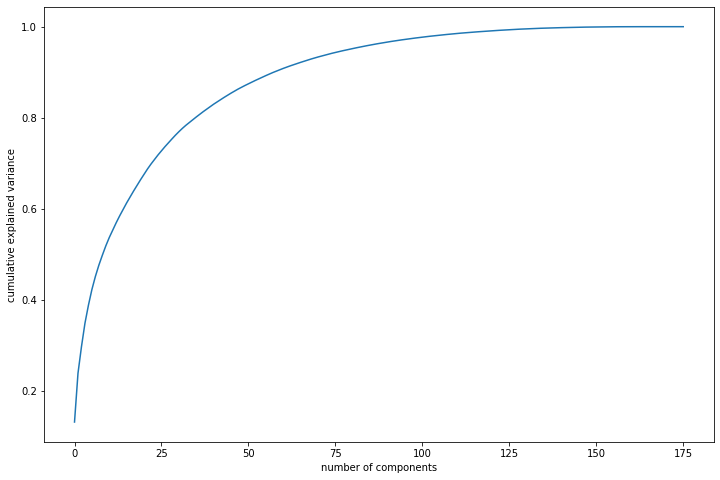

In [136]:
# ScreePlot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Around 60-80 components seems to be explaining 90%-95% variance

In [137]:
# Let's create model using 65 components as it covers around 90% variance
pca1 = IncrementalPCA(n_components=65)

In [138]:
pca_train = pca1.fit_transform(X_train)
pca_train.shape

(21000, 65)

In [139]:
# Calculation correlation
corrmat = np.corrcoef(pca_train.transpose())

In [140]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.001072997006403601 , min corr:  -0.0019000387229198546


In [141]:
pca_test = pca1.transform(X_test)
pca_test.shape

(9001, 65)

### There is no correlation between components after applying PCA

# PCA with Logistic Regression

In [142]:
# creating pipeline for Logistic Regression with PCA model
pca = PCA()

lr = LogisticRegression(class_weight='balanced')

steps = [("scaler", StandardScaler()), ("pca", pca), ("logistic", lr)]

pca_lr = Pipeline(steps)

params = {'pca__n_components': [40, 60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

pca_lr_model = GridSearchCV(estimator=pca_lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [143]:
pca_lr_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C...
                                                           multi_class='warn',
       

In [144]:
pd.DataFrame(pca_lr_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.205227,0.013648,0.085149,0.007038,0.1,l1,40,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.899546,0.905745,0.915612,0.907477,0.905523,0.906781,0.005167,34
1,3.779378,0.206109,0.089878,0.018639,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.905212,0.915472,0.917350,0.914415,0.913129,0.913116,0.004187,17
2,4.747939,0.173787,0.089236,0.005527,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.905731,0.919329,0.919042,0.915422,0.916449,0.915195,0.004962,2
3,3.098202,0.329285,0.106545,0.022042,0.1,l2,40,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.899480,0.905562,0.915131,0.906848,0.905314,0.906467,0.005024,38
4,3.933649,0.209850,0.101870,0.026111,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.905032,0.915884,0.916319,0.913980,0.913223,0.912888,0.004093,22
5,5.097159,0.478820,0.100802,0.010289,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.905744,0.919173,0.919182,0.915524,0.916791,0.915283,0.004973,1
6,2.727276,0.203294,0.093030,0.025319,0.5,l1,40,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.899428,0.905993,0.915454,0.907365,0.906175,0.906883,0.005110,33
7,3.591533,0.278381,0.105892,0.014307,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.905156,0.915859,0.916284,0.914243,0.912973,0.912903,0.004049,21
8,4.611215,0.298184,0.093747,0.009717,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.905780,0.919114,0.919046,0.915236,0.916701,0.915175,0.004921,3
9,3.115938,0.209179,0.107423,0.019303,0.5,l2,40,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.898781,0.905441,0.915008,0.906734,0.905513,0.906295,0.005175,45


In [145]:
# best parameters to select
pca_lr_model.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}

In [146]:
pca_lr_model.best_score_

0.9152826383538445

In [147]:
# predicting the churn
y_pca_lr_pred = pca_lr_model.predict(X_test)

In [148]:
confusion_pca_lr = confusion_matrix(y_test, y_pca_lr_pred)
confusion_pca_lr

array([[7051, 1200],
       [ 123,  627]], dtype=int64)

In [150]:
accuracy_score(y_pca_lr_pred, y_test)

0.8530163315187201

In [151]:
TP = confusion_pca_lr[1,1] # true positive 
TN = confusion_pca_lr[0,0] # true negatives
FP = confusion_pca_lr[0,1] # false positives
FN = confusion_pca_lr[1,0] # false negatives

In [152]:
sensitivity_pca_lr = TP / float(TP+FN)
specificity_pca_lr = TN / float(TN+FP)

In [153]:
print('Using PCA with LR : Sensitivity - '+str(sensitivity_pca_lr)+' Specificity - '+str(specificity_pca_lr) )

Using PCA with LR : Sensitivity - 0.836 Specificity - 0.8545630832626349


# PCA with SVM

In [154]:
# creating pipeline for SVM  with PCA model
pca = PCA()

svm = SVC(class_weight='balanced', kernel="rbf")

steps = [("scaler", StandardScaler()), ("pca", pca), ("SVM", svm)]

pca_svm = Pipeline(steps)

params = {'pca__n_components': [40, 60, 80], 'SVM__C': [0.1, 1, 5, 10]}

folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

pca_svm_model = GridSearchCV(estimator=pca_svm, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [156]:
pca_svm_model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('SVM',
                                        SVC(C=1.0, cache_size=200,...
                                            decision_function_shape='ovr',
          

In [157]:
pd.DataFrame(pca_svm_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVM__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,39.674002,0.127761,9.438346,0.029074,0.1,40,"{'SVM__C': 0.1, 'pca__n_components': 40}",0.895107,0.902922,0.903004,0.900344,0.003703,5
1,47.469245,0.569641,13.642147,0.149537,0.1,60,"{'SVM__C': 0.1, 'pca__n_components': 60}",0.902878,0.910704,0.911307,0.908296,0.003839,2
2,54.332992,1.026655,16.526091,0.404637,0.1,80,"{'SVM__C': 0.1, 'pca__n_components': 80}",0.906975,0.914046,0.915204,0.912075,0.003637,1
3,54.278639,1.291556,6.674176,0.525811,1,40,"{'SVM__C': 1, 'pca__n_components': 40}",0.880879,0.901686,0.889345,0.890637,0.008543,7
4,39.525390,5.537506,8.875092,0.624441,1,60,"{'SVM__C': 1, 'pca__n_components': 60}",0.895281,0.914223,0.902329,0.903945,0.007817,4
5,35.926283,1.912644,10.515187,0.412892,1,80,"{'SVM__C': 1, 'pca__n_components': 80}",0.899790,0.917478,0.906878,0.908049,0.007269,3
6,68.763708,1.488884,5.884393,0.663977,5,40,"{'SVM__C': 5, 'pca__n_components': 40}",0.865312,0.874547,0.865744,0.868534,0.004255,11
7,58.052667,4.497834,7.433209,0.854054,5,60,"{'SVM__C': 5, 'pca__n_components': 60}",0.879027,0.892671,0.883587,0.885095,0.005671,8
8,44.979971,6.307452,9.212405,0.475473,5,80,"{'SVM__C': 5, 'pca__n_components': 80}",0.887171,0.896261,0.890836,0.891423,0.003734,6
9,73.510180,4.307975,7.707095,0.635714,10,40,"{'SVM__C': 10, 'pca__n_components': 40}",0.855372,0.863862,0.855406,0.858213,0.003994,12


In [158]:
pca_svm_model.best_params_

{'SVM__C': 0.1, 'pca__n_components': 80}

In [159]:
pca_svm_model.best_score_

0.9120749299092522

In [160]:
# predicting the churn
y_pca_svm_pred = pca_svm_model.predict(X_test)

In [161]:
confusion_pca_svm = confusion_matrix(y_test, y_pca_svm_pred)
confusion_pca_svm

array([[7371,  880],
       [ 152,  598]], dtype=int64)

In [162]:
TP = confusion_pca_svm[1,1] # true positive 
TN = confusion_pca_svm[0,0] # true negatives
FP = confusion_pca_svm[0,1] # false positives
FN = confusion_pca_svm[1,0] # false negatives

In [163]:
sensitivity_pca_svm = TP / float(TP+FN)
specificity_pca_svm = TN / float(TN+FP)

In [164]:
print('Using PCA with SVM : Sensitivity - '+str(sensitivity_pca_svm)+' Specificity - '+str(specificity_pca_svm) )

Using PCA with SVM : Sensitivity - 0.7973333333333333 Specificity - 0.8933462610592655


In [166]:
accuracy_score(y_pca_svm_pred, y_test)

0.8853460726585934

# PCA with Random Forest

In [167]:
# creating pipeline for Random Forest with PCA
model
pca = PCA()

rf = RandomForestClassifier(class_weight='balanced', random_state = 42)

steps = [("scaler", StandardScaler()), ("pca", pca), ("classifier", rf)]

pca_rf = Pipeline(steps)

params = {'pca__n_components': [40, 60, 80],
    'classifier__max_depth': [4,8,10],
    'classifier__min_samples_leaf': [100, 300],
    'classifier__min_samples_split': [200, 400],
    'classifier__n_estimators': [100, 200], 
    'classifier__max_features': [5, 20]
    }

folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

pca_rf_model = GridSearchCV(estimator=pca_rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [168]:
pca_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'pca', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'classifier__bootstrap', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])

In [169]:
pca_rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 19.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('classifier',
                                        RandomForestClassi...
                                verbose=False),
             iid='warn', n_jobs=-1,
  

In [170]:
pd.DataFrame(pca_rf_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.210990,0.123002,0.182253,0.032098,4,5,100,200,100,40,"{'classifier__max_depth': 4, 'classifier__max_...",0.888888,0.893398,0.901470,0.894585,0.005205,79
1,5.313145,0.059628,0.239526,0.014730,4,5,100,200,100,60,"{'classifier__max_depth': 4, 'classifier__max_...",0.890139,0.891470,0.904343,0.895317,0.006405,75
2,5.527483,0.132270,0.343669,0.134384,4,5,100,200,100,80,"{'classifier__max_depth': 4, 'classifier__max_...",0.884725,0.895923,0.906414,0.895687,0.008856,72
3,8.535104,0.292618,0.265564,0.055598,4,5,100,200,200,40,"{'classifier__max_depth': 4, 'classifier__max_...",0.888841,0.895311,0.901619,0.895257,0.005217,76
4,9.040198,0.210748,0.432194,0.014729,4,5,100,200,200,60,"{'classifier__max_depth': 4, 'classifier__max_...",0.888189,0.894540,0.905397,0.896042,0.007105,68
5,9.751404,0.736741,0.390534,0.113368,4,5,100,200,200,80,"{'classifier__max_depth': 4, 'classifier__max_...",0.887305,0.893728,0.909508,0.896847,0.009329,61
6,5.691373,0.155864,0.187454,0.000001,4,5,100,400,100,40,"{'classifier__max_depth': 4, 'classifier__max_...",0.890207,0.897149,0.901388,0.896248,0.004609,66
7,6.009002,0.136377,0.312431,0.000004,4,5,100,400,100,60,"{'classifier__max_depth': 4, 'classifier__max_...",0.887201,0.892068,0.903050,0.894106,0.006629,83
8,6.337049,0.127759,0.275978,0.081005,4,5,100,400,100,80,"{'classifier__max_depth': 4, 'classifier__max_...",0.885036,0.893717,0.905755,0.894836,0.008495,78
9,10.398595,0.148927,0.302012,0.026552,4,5,100,400,200,40,"{'classifier__max_depth': 4, 'classifier__max_...",0.886834,0.895525,0.900550,0.894303,0.005666,82


In [171]:
pca_rf_model.best_params_

{'classifier__max_depth': 8,
 'classifier__max_features': 5,
 'classifier__min_samples_leaf': 100,
 'classifier__min_samples_split': 200,
 'classifier__n_estimators': 200,
 'pca__n_components': 80}

In [172]:
pca_rf_model.best_score_

0.9058516591858919

In [173]:
y_pca_rf_pred = pca_rf_model.predict(X_test)

In [174]:
confusion_pca_rf = confusion_matrix(y_test, y_pca_svm_pred)
confusion_pca_rf

array([[7371,  880],
       [ 152,  598]], dtype=int64)

In [175]:
TP = confusion_pca_rf[1,1] # true positive 
TN = confusion_pca_rf[0,0] # true negatives
FP = confusion_pca_rf[0,1] # false positives
FN = confusion_pca_rf[1,0] # false negatives

In [176]:
sensitivity_pca_rf = TP / float(TP+FN)
specificity_pca_rf = TN / float(TN+FP)

In [177]:
print('Using PCA with Random Forest : Sensitivity - '+str(sensitivity_pca_rf)+' Specificity - '+str(specificity_pca_rf) )

Using PCA with Random Forest : Sensitivity - 0.7973333333333333 Specificity - 0.8933462610592655


In [179]:
accuracy_score(y_pca_rf_pred, y_test)

0.8996778135762693

# Conclusion from above Analysis

#### The churn is highly dependent on 8th month's (August) data. But that can be also because the customer has already churned.

#### Considering the customer is not churned in 8th month, total outgoing and incoming minutes of 8th month, data usuage, roaming, auc of 8th month are very strong indicator whether customers are churned or not 

#### The telecom company should introduce some good schemes/offers to the customer who show drop in incoming, outgoing, data usage in the month of August

#### Company should also introduce good ISD and STD offers to bring churn rate down

#### Offer more discounts to the customers who are less than 3 years old to the network as it is observed the just joined customer have more probabilty to get churned